In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 

In [3]:
housing_data = datasets.load_boston() 

In [4]:
#将数据打乱
x, y = shuffle(housing_data.data, housing_data.target, random_state=7) 

In [5]:
num_training = int(0.8*len(x))

x_train, y_train = x[:num_training], y[:num_training]
x_test, y_test = x[num_training:], y[num_training:]

In [6]:
#拟合决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [7]:
#AdaBoost算法的决策树回归模型
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [8]:
y_pred_dt = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test,y_pred_dt)
evs = explained_variance_score(y_test,y_pred_dt)
print("\n#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [9]:
y_pred_ab = ab_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("\n#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### AdaBoost performance ####
Mean squared error = 7.54
Explained variance score = 0.91


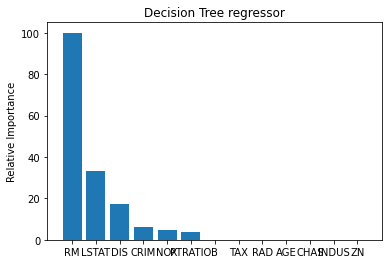

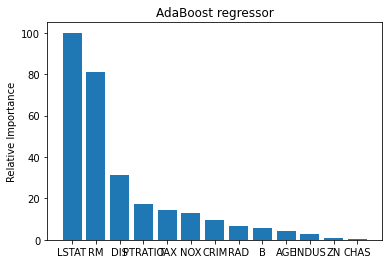

In [10]:
def plot_feature_importances(feature_importances, title, feature_names):
    #将重要性值标准化
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    #将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
 
    #让x轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0]) + 0.5
 
    #画条形图
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align = 'center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
    return None
#作图
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor',
                         housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor',
                         housing_data.feature_names)